## Data Programming Team Project
## Team Boa
## Analysis of NBA Dataset using General Statistics and K-Means Clustering

### Scenario:
#### 1. You have been employed as a consulting Data Scientist for an NBA League Team.
#### 2. The Team Manager has asked you to do the following:-
####    i. Gather data of all the players from the recent season and make it analysis ready.
####    ii. Perform statistical analysis on the various attributes of the players and see how one attribute affects the other.
####    iii. Help the team in search of better Point Guards.

### Data Sources:
#### 1. Stats about players - http://www.nbastuffer.com/2016-2017_NBA_Regular_Season_Player_Stats.html
#### 2. Meaning of the stats - http://www.basketball-reference.com/about/glossary.html
####                                       & http://www.databasebasketball.com/about/aboutstats.htm
#### 3. Point Guards - https://en.wikipedia.org/wiki/Point_guard

### About the Data
#### In NBA media coverage, sports reporters usually focus on a handful of players and paint stories of how unique these players' stats are. With our data science hats on, we can't help but feel a slight sense of skepticism to how different the players are from one another. Let's see how we can use data science to explore that thread further.
#### Let's look at the dataset of player performance from the 2013-2014 season.
#### Here are some selected columns:
#### 1. PLAYER - Name of the Player
#### 2. TEAM - Team for which he is playing
#### 3. POS - The position of the player
#### 4. PPG - Points Per Game made by the Player
#### 5. APG - Assists Per Game made by the Player

#### The first and foremost step is to get the data in the proper format.
#### In this case, we have got the data in the format of CSV.
#### We will use the read_csv function of Pandas to read the values into the dataframe 'nba'.

In [2]:
import pandas as pd
import numpy as np

nba = pd.read_csv("nba_2016.csv")
nba.head(3)

,PLAYER,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TOV,FTA,...,3P%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,VI
0,Aaron Brooks,Ind,PG,32,46,14.3,29.9,19.6,0.173,29,...,0.337,0.505,5.2,1.1,4.4,2.2,22.5,0.48,0.17,6.5
1,Aaron Gordon,Orl,SF,21,56,27.6,57.6,19.6,0.091,137,...,0.292,0.503,11.2,4.6,9.1,1.9,11.2,0.75,0.43,6.7
2,Adreian Payne,Min,PF,25,12,7.7,16.1,25.2,0.133,15,...,0.200,0.526,4.0,1.7,12.6,0.3,6.9,0.42,0.33,6.6


### Mean and Variance
#### Mean is basically the sum of all the individual data divided by the number of elements present in the dataset.
#### Mean has an interesting property: If we subtract the mean of a set of numbers from each of the numbers, the differences will add up to be zero.
#### This is because mean is the "center" of the data. All of the differences that are negative will always cancel out all the differences that are positive.

#### Variance tells us how "spread out" the data is around the mean. It directly measures how far from the mean the average element of the data is.
#### We calculate variance by subtracting every value from the mean, squaring the results, and averaging them.

#### The PTS field contains the number of Total points a player has scored in the current season. It has been made by multiplying the PPG (Points Per Game) with the GP (Games Played) by the player.
#### Let's look at the variance of the Points field.

In [3]:
point_variance = 0
square_difference = 0
nba["PTS"]=nba["PPG"]*nba["GP"]
pts_mean = nba["PTS"].mean()
for pt in nba["PTS"]:
    difference = pt - pts_mean
    square_difference = difference ** 2
    point_variance += square_difference
point_variance = point_variance/len(nba["PTS"])
print("Point Variance=",point_variance)

Point Variance= 120369.853557


### Standard Deviation
#### Another commonly used way to refer how far data points are from the mean is called Standard Deviation.
#### It's typically used to measure what percentage of the data is within 1 Standard Deviation of the mean, or 2 Standard Deviations of the Mean.
#### Standard Deviation is just the Square Root of the Variance.

#### We will calculate the Standard Deviation of the MP (Minutes Played) and the AST (Assists) column, which have been created from the MPG (Minutes Played per Game) and APG (Assists Per Game) columns. 

In [4]:
def std_dev(lis):
    list_sum=0
    variance=0
    std=0
    mean = lis.mean()
    for p in lis:
        diff = p - mean
        power = diff ** 2
        list_sum += power
    variance = list_sum / len(lis)
    std = variance ** (1/2)
    return std
nba["MP"]=nba["MPG"]*nba["GP"]
nba["AST"]=nba["APG"]*nba["GP"]
mp_dev = std_dev(nba["MP"])
ast_dev = std_dev(nba["AST"])
print("Std Deviation of Minutes Played=",mp_dev)
print("Std Deviation of Assists=",ast_dev)

Std Deviation of Minutes Played= 576.246929899
Std Deviation of Assists= 94.7668443648


#### We can plot the Standard Deviation on a histogram plot so as to see how sppread out the values are across the chart.
#### We can say that a certain point is "one standard deviation away from the mean" if it lies at that same distance away from the mean.
#### Here we are plotting the Histogram Plot of PTS column with its Mean (Red) and Standard Deviation (Green).

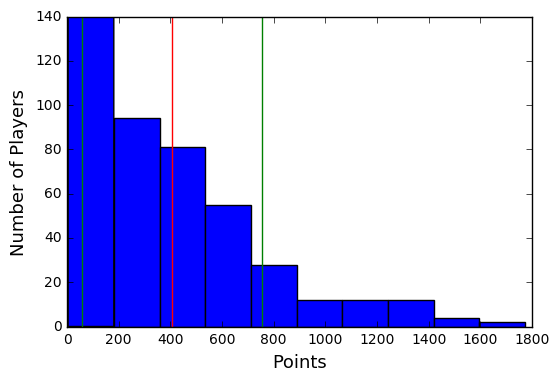

In [5]:
import matplotlib.pyplot as plt

plt.hist(nba["PTS"])
mean = nba["PTS"].mean()
plt.axvline(mean, color='r')
std_dev = nba["PTS"].std()
plt.axvline(mean - std_dev, color='g')
plt.axvline(mean + std_dev, color='g')
plt.xlabel('Points',fontsize=13)
plt.ylabel('Number of Players', fontsize=13)
plt.show()

### Scatterplots
#### Distributions like Histograms tell us a lot about how a single variable varies with some standard like time.
#### But sometimes it is vital to look how two variables correlate with each other.
#### A lot of statistics is about analyzing how variables impact each other, and the first step is to graph them out with a scatterplot.
#### If two variables both change together (i.e., when one goes up, the other goes up), we know that they are correlated. 

#### First, we will find correlation between FGA (Field Goals Attempted) on the x-axis and PTS (Points Scored) on the y-axis.
#### The plot is close to a straight line, which shows strong correlation.
#### The plot also slopes upwards, which means that as field goal attempts go up, so do points.
#### That means plot is positively correlated.

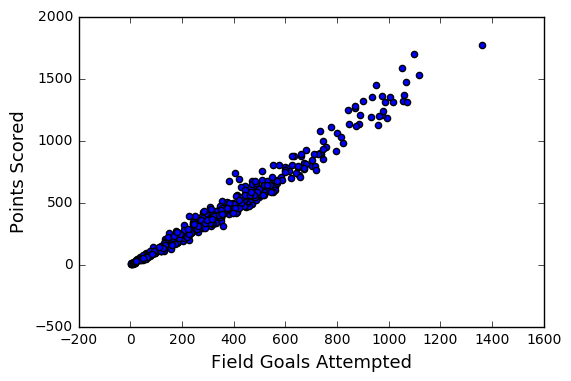

In [6]:
nba["FGA"] = nba["2PA"] + nba["3PA"]
nba["TRB"] = nba["TRB%"] * 100

plt.scatter(nba["FGA"], nba["PTS"])
plt.xlabel('Field Goals Attempted',fontsize=13)
plt.ylabel('Points Scored', fontsize=13)
plt.show()

#### We can also plot TRB (Total Rebounds) i.e. number of times someone got the ball back fro their team after someone shot) vs AST (Total Assists) i.e. number of times someone helped another person score.
#### These are uncorrelated, so we will not see the same nice line you see with the plot above.

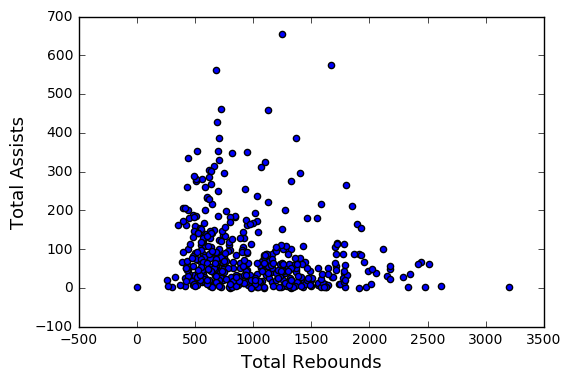

In [7]:
plt.scatter(nba["TRB"], nba["AST"])
plt.xlabel('Total Rebounds',fontsize=13)
plt.ylabel('Total Assists', fontsize=13)
plt.show()

#### Now we will plot FTA (Free throws Attempted) against PTS (Points Scored). We can see that there is some Positive Correlation between the two attributes.

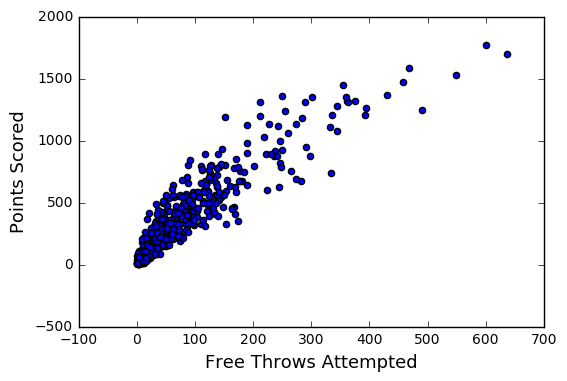

In [8]:
plt.scatter(nba["FTA"], nba["PTS"])
plt.xlabel('Free Throws Attempted',fontsize=13)
plt.ylabel('Points Scored', fontsize=13)
plt.show()

### Measuring correlation with Pearson's R
#### One thing that can help us a lot when we need to analyze a lot of variables is to measure correlation - so we do not need to eyeball everything.
#### The most common way to do this is to use Pearson's r, also called an r-value.

#### An r-value ranges from -1 to 1, and indicates how two variables are correlated.
#### A 1 means perfect perfect positive correlation - this would show as a straight, upward-sloping line.
#### A 0 means no correlation - you'll see a scatterplot with points placed randomly.
#### A -1 means perfect negative correlation - this would show as a straight, downward-sloping line.
#### Anything between -1 and 0, and 0 and 1 will show up as a scattering of points. The closer the values is to 0, the more random the plot will look. The closer to -1 or 1, the more like a line the points will look.

#### We will use a function from scipy to calculate Pearson's r for the following attributes:
####     1. FGA (Field Goals Attempted) vs PTS (Points Scored)
####     2. TRB (Total Rebounds) vs AST (Total Assists)
####     3. FTA (Field Throws Attempted) vs PTS (Points Scored)

In [9]:
# Calculating Pearson R value
from scipy.stats.stats import pearsonr

r, p_value = pearsonr(nba["FGA"], nba["PTS"])
print("r value (Field Goals Attempted vs Points Scored)=",r)

r, p_value = pearsonr(nba["TRB"],nba["AST"])
print("r value (Total Rebounds vs Total Assists)=", r)

r_fta_pts, p_value = pearsonr(nba["FTA"],nba["PTS"])
print("r value (Field Throws Attempted vs Points Scored)=",r_fta_pts)

r value (Field Goals Attempted vs Points Scored)= 0.987780017879
r value (Total Rebounds vs Total Assists)= -0.165838976114
r value (Field Throws Attempted vs Points Scored)= 0.90890979205


### Covariance
#### Covariance is how things vary together.
#### Correlation is a form of Covariance. Correlation happens when both variables vary in similar ways.

#### There is a maximum amount of how much two variables can co-vary.
#### This is because of how each variable is individually distributed. Each individual distribution has its own variance. These variances set a maximum theoretical limit on covariance between two variables -- you can't co-vary more from the mean than the two variables individually vary from the mean.
#### The r-value discussed above is a ratio between the actual covariance, and the maximum possible positive covariance. The maximum possible covariance occurs when two variables vary perfectly (i.e. you see a straight line on the plot).

#### Here, we will see the covariance between FTA (Field Throws Attempted) and PTS (Poinst Scored).

In [10]:
def covariance(x, y):
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

cov_fga_pts = covariance(nba["FGA"],nba["PTS"])
print("Covariance Between FGA and PTS=", cov_fga_pts)

cov_trb_ast = covariance(nba["TRB"],nba["AST"])
print("Covariance Between TRB and AST=",cov_trb_ast)

cov_fta_pts = covariance(nba["FTA"], nba["PTS"])
print("Covariance Between FTA and PTS=", cov_fta_pts)

Covariance Between FGA and PTS= 90177.1429659
Covariance Between TRB and AST= -7661.32446798
Covariance Between FTA and PTS= 30853.0809659


### Correlation Calculation
#### We can now calculate Correlation manually by dividing the covariance of two attributes by the product of their Standard Deviations.

In [11]:
def standard_dev(lis):
    mean = sum(lis) / len(lis)
    variances = [(i - mean) ** 2 for i in lis]
    variance = sum(variances) / len(variances)
    standard_deviation = variance ** (1/2)
    return standard_deviation

std_fta = standard_dev(nba["FTA"])
std_ast = standard_dev(nba["AST"])
std_fga = standard_dev(nba["FGA"])
std_pts = standard_dev(nba["PTS"])
std_trb = standard_dev(nba["TRB"])

r_fga_pts = cov_fga_pts / (std_fga * std_pts)
r_trb_ast = cov_trb_ast / (std_trb * std_ast)
r_fta_pts = cov_fta_pts / (std_fta * std_pts)

print("Correlation Coefficient between FGA and PTS=",r_fga_pts)
print("Correlation Coefficient between TRB and AST=",r_trb_ast)
print("Correlation Coefficient between FTA and PTS=",r_fta_pts)

Correlation Coefficient between FGA and PTS= 0.987780017879
Correlation Coefficient between TRB and AST= -0.165838976114
Correlation Coefficient between FTA and PTS= 0.90890979205


### Point Guards
#### Point guards play one of the most crucial roles on a team because their primary responsibility is to create scoring opportunities for the team.
#### We will be using a technique called clustering (K-means) which allows us to visualize the types of point guards as well as group similar point guards together.
#### We will be using two features to visualize the players as it will also make it easier to grasp how clustering works.

#### For point guards, it's widely accepted that the Assist to Turnover Ratio is a good indicator for performance in games as it quantifies the number of scoring opportunities that player created. Let's also use Points Per Game, since effective Point Guards not only set up scoring opportunities but also take a lot of the shots themselves.

#### The first part of our classification is to create a new dataframe 'point_guards' which will contain only those players who have Point Guard position in their teams.

In [12]:
point_guards = nba[nba['POS']=='PG']
point_guards.head(3)

,PLAYER,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TOV,FTA,...,APG,AST%,SPG,BPG,VI,PTS,MP,AST,FGA,TRB
0,Aaron Brooks,Ind,PG,32,46,14.3,29.9,19.6,0.173,29,...,2.2,22.5,0.48,0.17,6.5,239.2,657.8,101.2,226,440.0
35,Beno Udrih,Det,PG,34,30,14.0,29.2,19.7,0.129,26,...,3.0,32.7,0.23,0.00,8.0,171.0,420.0,90.0,150,500.0
46,Brandon Jennings,Nyk,PG,27,56,25.0,52.2,17.7,0.180,130,...,5.0,28.2,0.96,0.05,7.7,487.2,1400.0,280.0,417,560.0


#### The next step is to create a column ATR (Assists to Turn-Over Ratio) which will contain the ratio of APG (Assists Per Game) multiplied with GP (Games Played) to TOV (Turn Over Ratio).

In [13]:
point_guards = point_guards[point_guards['TOV']!=0]
point_guards['ATR'] = (point_guards['APG']*point_guards['GP'])/(point_guards['TOV']*100)

#### We will use matplotlib to create a scatter plot with Points Per Game (PPG) on the X axis and Assist Turnover Ratio (ATR) on the Y axis.

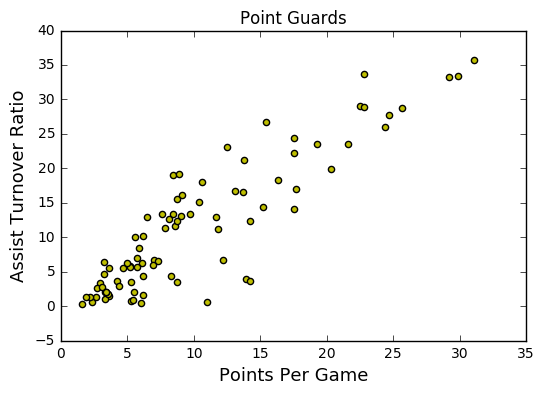

In [14]:
from matplotlib import pyplot as plt

plt.scatter(point_guards['PPG'],point_guards['ATR'],c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game',fontsize=13)
plt.ylabel('Assist Turnover Ratio',fontsize=13)
plt.show()

### Clustering Players
#### There seem to be 6 general regions, or clusters, that the point guards fall into (with a few outliers of course!). We can use a technique called clustering to segment all of the point guards into groups of alike players. While regression and other supervised machine learning techniques work well when we have a clear metric we want to optimize for and lots of pre-labelled data, we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.

#### There are multiple ways of clustering data but here we will focus on centroid based clustering for this lesson. Centroid based clustering works well when the clusters resemble circles with centers (or centroids). The centroid represent the arithmetic mean of all of the data points in that cluster.

#### K-Means Clustering is a popular centroid-based clustering algorithm that we will use. The K in K-Means refers to the number of clusters we want to segment our data into. The key part with K-Means (and most unsupervised machine learning techniques) is that we have to specify what k is. There are advantages and disadvantages to this, but one advantage is that we can pick the k that makes the most sense for our use case. We'll set k to 6 since we want K-Means to segment our data into 6 clusters.

### The Algorithm
#### K-Means is an iterative algorithm that switches between recalculating the centroid of each cluster and the players that belong to that cluster. To start, select 6 players at random and assign their coordinates as the initial centroids of the just created clusters.
#### Step 1 : Assign Points to Clusters. For each player, calculate the Euclidean distance between that player's coordinates, or values for atr & ppg, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

#### Sub-step 1 : Assigning Clusters to random Data Points.

In [15]:
num_clusters = 6
# Using numpy's random function to generate a list, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]
print(centroids)

              PLAYER TEAM POS  AGE  GP   MPG  MIN%  USG%    TOV  FTA  \
413      Tyler Ennis  Hou  PG   22  31   6.3  13.2  19.4  0.269    3   
123     Eric Bledsoe  Pho  PG   27  56  33.2  69.2  28.2  0.148  393   
206    Jordan Farmar  Sac  PG   30   2  17.7  36.9  19.1  0.200    0   
120    Elfrid Payton  Orl  PG   22  58  29.1  60.7  21.9  0.143  137   
85   Darren Collison  Sac  PG   29  49  30.9  64.4  19.7  0.124  118   
436     Yogi Ferrell  Dal  PG   23  10  33.1  68.9  19.7  0.131   23   

       ...      AST%   SPG   BPG    VI     PTS      MP    AST  FGA    TRB  \
413    ...      24.5  0.19  0.00   6.8    58.9   195.3   34.1   64  540.0   
123    ...      31.4  1.38  0.41  10.5  1209.6  1859.2  347.2  889  820.0   
206    ...      38.7  1.00  0.00   7.8    12.0    35.4    9.0   12  490.0   
120    ...      31.8  1.10  0.45   8.9   725.0  1687.8  330.6  654  710.0   
85     ...      22.4  1.06  0.10   6.4   671.3  1514.1  205.8  528  400.0   
436    ...      23.5  1.60  0.20 

#### Sub-step 2 : Plotting cluster centroids.

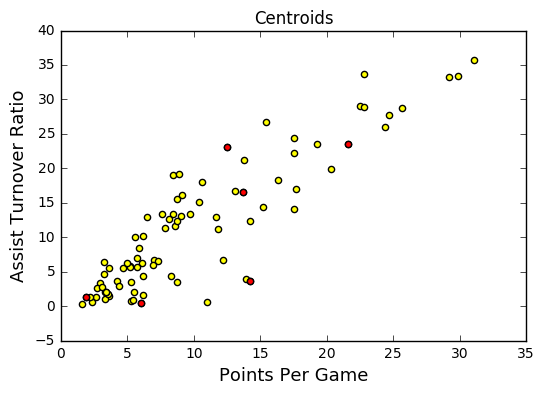

In [16]:
plt.scatter(point_guards['PPG'],point_guards['ATR'], c= 'yellow')
plt.scatter(centroids['PPG'],centroids["ATR"],c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game',fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

#### Sub-step 3 : Assigning cluster centroids to a dictionary.

In [17]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # Iterating counter for generating cluster_id
    counter = 0
    
    # Iterate pandas dataframe row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['PPG'],row['ATR']]
        dictionary[counter] = coordinates
        counter += 1
    return dictionary

centroids_dict = centroids_to_dict(centroids)

#### Sub-step 4 : Creating definition for calculating euclidean distance.

In [18]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference
        
    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

# Just to verify
q = [5,2]
p = [3,1]

# Sqrt(5) = -2.24
print(calculate_distance(q,p))

2.23606797749979


#### Sub-step 5 : Create a column 'cluster', which will contain the cluster number each point belongs to.

In [19]:
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['PPG'],row['ATR']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['CLUSTER'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

In [20]:
point_guards['CLUSTER'].head(5)

0     2
35    2
46    4
49    0
50    0
Name: CLUSTER, dtype: int64

#### Sub-step 6 : Visualizing the Clusters.

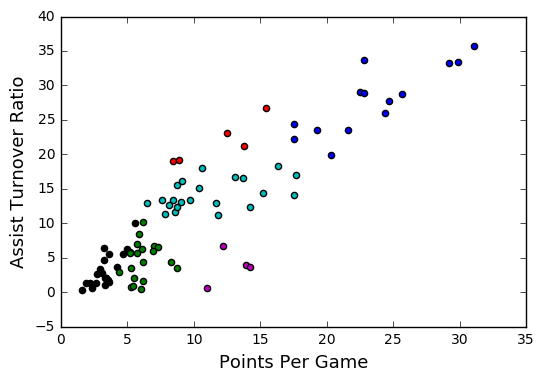

In [21]:
def visualize_clusters(df, num_clusters):
    colors = ['b','g','r','c','m','y','k']
    
    for n in range(num_clusters):
        clustered_df = df[df['CLUSTER'] == n]
        plt.scatter(clustered_df['PPG'], clustered_df['ATR'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()
    
visualize_clusters(point_guards, num_clusters)

#### Step 2 (Update New Centroids of the Clusters) For each cluster, compute the new centroid by calculating the arithmetic mean of all of the points (players) in that cluster. We calculate the arithmetic mean by taking the average of all of the X values (ATR) and the average of all of the Y values (PPG) of the points in that cluster.

In [22]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    for cluster_id in range(0,num_clusters):
        values_in_cluster = df[df['CLUSTER'] == cluster_id]
        new_centroid = [np.average(values_in_cluster['PPG']),np.average(values_in_cluster['ATR'])]
        new_centroids_dict[cluster_id] = new_centroid
        return new_centroids_dict
    
centroids_dict = recalculate_centroids(point_guards)

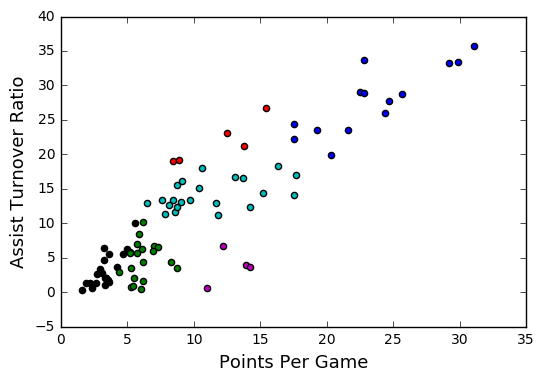

In [23]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

#### Iterate steps 1 & 2 until the clusters are no longer moving and have converged.

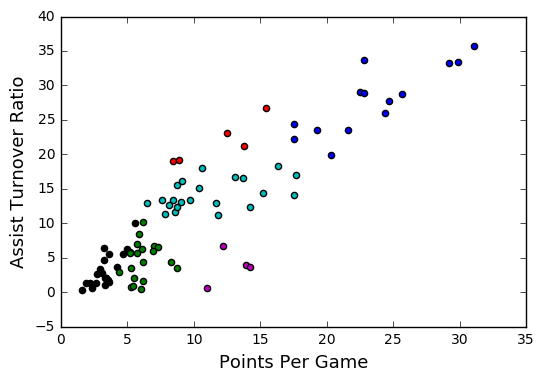

In [24]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

### Challenges of Clustering:-
#### As you repeat Steps 1 and 2 and run visualize_clusters, you'll notice that a few of the points are changing clusters between every iteration (especially in areas where 2 clusters almost overlap), but otherwise, the clusters visually look like they don't move a lot after every iteration. This means 2 things:
####   1. K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable
####   2. Because K-Means is conservative between iterations, where we pick the initial centroids and how we assign the players to clusters initially matters a lot

### Avoiding pitfalls using Scikit Learn.
#### To counteract these problems, the sklearn implementation of K-Means does some intelligent things like re-running the entire clustering process lots of times with random initial centroids so the final results are a little less biased on one passthrough's initial centroids.

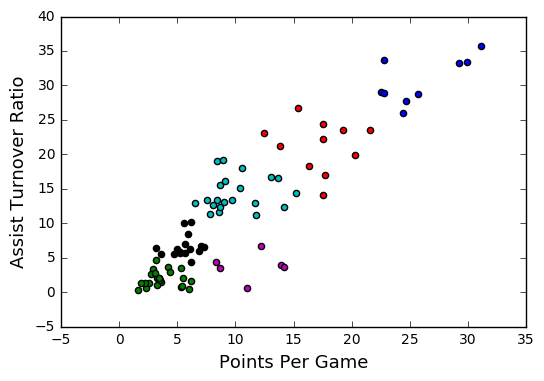

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = num_clusters)
kmeans.fit(point_guards[['PPG','ATR']])
point_guards['CLUSTER'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)

#### Through this project we were able to learn the Basic Statistics and Unsupervised Learning through K-Means Clustering in a real world scenario.
#### Although a lot can still be done to improve this but for now our foundation of Unsupervised Machine Learning has been laid.